# Übungen Dense Networks (Hausaufgabe #3)

## Aufgaben

> 1. Daten finden - z.B. Kaggle (Bilder oder tabular)
> 2. Train/Validation/Test split (Validation und Test - kein Shuffle) - sklearn oder manuell
>    - Beim Training - loss etc auf beiden berechen (Train und Valid)
>    - über Trainings-Erfolg anhand von Validation set entscheiden.
>    - Testset nur zur auswertung verwenden.
> 3. Eigenes Early Stopping implementieren: d.h. wenn Validation Loss über n (zu definieren, z.B. 10 oder 20) iterationen nicht kleiner wurde (delta zu definieren z.B. 10^(-4)), wird das training gestoppt und das letzte model gespeichert
> 4. bitte selbst rausfinden, wie man ein torch model speichert
> 5. Accuracy (gerne auch Precision und Recall)
> 6. Model Graph plotten
>7. Loss von train history plotten (weitere sinnvolle plots willkommen)



## Übungssetup

### Teammitglieder Gruppe 3

- Hans Wermelinger
- Helmut Gehrer
- Markus Näpflin
- Nils Hryciuk
- Stefano Mavilio

### Laufzeitumgebung

Damit dieses Jupyter-Notebook ausgeführt werden kann, müssen folgende Module im aktuellen Python-Environment verfügbar sein:

- numpy
- math
- torch
- matplotlib
- pandas
- ucimlrepo
- torchviz

Alternativ kann es auch auf [Google Collab](https://colab.research.google.com) ([Direktlink für Nutzer mit Repo-Zugriff](https://colab.research.google.com/drive/1JD3WTwuVqvwdMYR9HfV_wg2kcuQmqToU)) ausgeführt werden.

## Lösungsweg

### Vorbereitung des Jupyter-Notebooks
Nur für *Google Collab*: ucimlrepo und tochviz vorgängig in Workspace installieren

In [ ]:
# Für Google Colab: Installation und Import von ucimlrepo und torchviz
# Muss einmalig pro neues Session / Laufzeit ausgeführt werden.
!!pip install ucimlrepo torchviz

['Collecting ucimlrepo',
 '  Downloading ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)',
 'Collecting torchviz',
 '  Downloading torchviz-0.0.2.tar.gz (4.9 kB)',
 '  Preparing metadata (setup.py) ... \x1b[?25l\x1b[?25hdone',
 'Requirement already satisfied: pandas>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from ucimlrepo) (2.2.2)',
 'Requirement already satisfied: certifi>=2020.12.5 in /usr/local/lib/python3.10/dist-packages (from ucimlrepo) (2024.8.30)',
 'Requirement already satisfied: torch in /usr/local/lib/python3.10/dist-packages (from torchviz) (2.5.0+cu121)',
 'Requirement already satisfied: graphviz in /usr/local/lib/python3.10/dist-packages (from torchviz) (0.20.3)',
 'Requirement already satisfied: numpy>=1.22.4 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.0.0->ucimlrepo) (1.26.4)',
 'Requirement already satisfied: python-dateutil>=2.8.2 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.0.0->ucimlrepo) (2.8.2)',
 'Requirement already satis

Wir importieren benötigte Python Packages, und konfigurieren unsere Umgebung und definieren später benötigte Funktionen.

In [ ]:
# -*- coding: utf-8 -*-
# --- Generelle Importe; spezifische werden näher bei der Nutzung importiert ---
import math
import torch
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [ ]:
# --- Generell verwendete Funktionen ---
def log_finished_task(task: str):
    now = datetime.now()
    print(f'👍🏻 {now} - {task}')


def print_progress_bar(iteration, total, prefix='', suffix='', decimals=1, length=50, fill='=', cancel=False):
    """
    Anzeige eines Fortschrittsbalkens. Diese Methode muss iterativ aufgerufen werden, um den Balken
    zu aktualisieren.
    @params:
        iteration   - Required  : Aktuelle Iteration (Int)
        total       - Required  : Gesamtzahl Iteationen (Int)
        prefix      - Optional  : Vorangestelles Label (Str)
        suffix      - Optional  : Nachfolgende Beschreibung (Str)
        decimals    - Optional  : Anzahl Nachkommastellen bei %-Angabe (Int)
        length      - Optional  : Länge des Prozentbalkens (Anzahl Zeichen) (Int)
        fill        - Optional  : Zeichen, mit welchem der Fortschittsbalken gefüllt werden soll (Str)
        cancel      - Optional  : Wird die Verarbeitung frühzeitig abgebrochen
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filled_length = int(length * iteration // total)
    bar = fill * filled_length + '-' * (length - filled_length)
    print(f'\r{prefix} [{bar}] {percent}% {suffix}', end='\r')
    # Print New Line on Complete
    if iteration == total or cancel:
        print()


def print_dataframe_info(dataframe: pd.DataFrame, name: str):
    """
    Gibt Informationen über einen Panda Dataframe aus.
    @params
    - dataframe - Required : der DataFrame, dessen Informationen ausgegeben werden sollen
    - name:  - Required : der Name des Tensors
    """
    print("Pandas DataFrame: ", name)
    print("  - Form: ", dataframe.shape)
    print("  - Shape: ", dataframe.size)
    print("  - Head: ", dataframe.head())


def print_tensor_info(tensor: torch.tensor, name: str):
    """
    Gibt Informationen über einen Tensor aus.
    @params
    - tensor - Required : der Tensor, dessen Informationen ausgegeben werden sollen
    - name:  - Required : der Name des Tensors
    """
    print("PyTorch Tensor: ", name)
    print("  - Type: ", tensor.dtype)
    print("  - Shape: ", tensor.size())
    print("  - Values: ", tensor)

def draw_dataframe_heatmap (dataframe , name: str):
    """
    Visualisiert die Verteilung von Daten in einem Dataframe.
    @params
    - tensor - Required : der Tensor, dessen Informationen ausgegeben werden sollen
    - name:  - Required : der Name des Tensors
    """
    sns.heatmap(dataframe, annot=False, cmap="viridis")
    plt.title('Heatmap von Dataframe ' + name)
    plt.show()

log_finished_task("Generelle Funktionen sind (neu) definiert.")

👍🏻 2024-11-12 07:03:58.532138 - Generelle Funktionen sind (neu) definiert.


In [ ]:
# --- Setup Jupyter Notebook ---
verbose = False # True, wenn ausführliche Informationen angezeigt werden sollen
MODEL_DTYPE = torch.long # Datentyp für Tensoren
EPOCH_ITERATIONS = 1000 # Iterationen beim Lernen
DEFAULT_SEED = 42 # Konstante für reproduzierbare Zufahlszahlen
DEFAULT_LEARNING_RATE = 0.0025 # Standard-Learning Rate

# --- Setup PyTorch ---
torch.manual_seed(DEFAULT_SEED)
# Performance-Optimierung durch Nutzung von GPU oder Multi-Process-Service verwenden
# device = {
#     torch.cuda.is_available(): "cuda", # GPU
#     torch.backends.mps.is_available(): "mps" # Metal-Performance-Service, z.B. Mac Mx;
# }.get(True, "cpu")
device = "cpu" # Pytorch Zickt bei long dtype und cuda
torch.set_default_device(device)

# --- Plotter initialisieren inkl. Inline-Ausgabe der Grafiken ---
plt.rcdefaults()
%matplotlib inline

log_finished_task("Setup abgeschlossen.")
print ("- Device ..........: ", device)
print ("- Epoch Iterations : ", EPOCH_ITERATIONS)
print ("- Learning Rate ...: ", DEFAULT_LEARNING_RATE)
print ("- Seed ............: ", DEFAULT_SEED)
print ("- verbose .........: ", verbose)


👍🏻 2024-11-12 07:03:58.561333 - Setup abgeschlossen.
- Device ..........:  cpu
- Epoch Iterations :  1000
- Learning Rate ...:  0.0025
- Seed ............:  42
- verbose .........:  False


### Aufgabe 3.1 Daten finden

Wir haben uns für [eines der auf openml.com gelisteten letter-Datasets](https://www.openml.org/search?type=data&status=active&qualities.NumberOfInstances=between_10000_100000&id=6&sort=runs) entschieden. Es stammt ursprünglich vom [UC Irvine - Data Learning Repository](https://archive.ics.uci.edu/dataset/59/letter+recognition).

Dieses erlaubt die Klassifizierung von Buchstaben anhand von  Metadaten.

Die folgenden Variablen sind in diesem Dataset vorhanden:

Die folgenden Variablen sind in diesem Dataset vorhanden:

| Variable Name	| Role |Type | Description	| Missing Values |
| ------------- | ---- | --- | ------------ | --------------|
| lettr | 	Target | Categorical | 	capital letter (26 values from A to Z) | no  |
| x-box | 	Feature	 | Integer	 | The horizontal position, counting pixels from the left edge of the image, of the center of the smallest rectangular box that can be drawn with all "on" pixels inside the box. | no |
| y-box	 | Feature	 | Integer | The vertical position, counting pixels from the bottom, of the above box. | no |
| width | 	Feature	 | Integer | The width, in pixels, of the box. | no |
| high	 | Feature	 | Integer | The height, in pixels, of the box. | no |
| onpix	 | Feature	 | Integer | 	The total number of "on" pixels in the character image. | no |
| x-bar	 | Feature	 | Integer	 | The mean horizontal position of all "on" pixels relative to the center of the box and divided by the width of the box. This feature has a negative value if the image is "left-heavy" as would be the case for the letter L. | 	no |
| y-bar | 	Feature | 	Integer	 | The mean vertical position of all "on" pixels relative to the center of the box and divided by the height of the box. | no |
| x2bar	 | Feature	 | Integer	 | The mean squared value of the horizontal pixel distances as measured in 6 above. This attribute will have a higher value for images whose pixels are more widely separated in the horizontal direction as would be the case for the letters W or M.| 	no |
| y2bar	 | Feature	 | Integer	 | The mean squared value of the vertical pixel distances as measured in 7 above. | no |
| xybar | 	Feature	 | Integer	 |  The mean product of the horizontal and vertical distances for each "on" pixel as measured in 6 and 7 above. This attribute has a positive value for diagonal lines that run from bottom left to top right and a negative value for diagonal lines from top left to bottom right. | no |
| x2ybr	 | Feature	 | Integer	 | The mean value of the squared horizontal distance times the vertical distance for each "on" pixel. This measures the correlation of the horizontal variance with the vertical position. | no |
| xy2br	 | Feature	 | Integer	 | The mean value of the squared vertical distance times the horizontal distance for each "on" pixel. This measures the correlation of the vertical variance with the horizontal position. | no |
| x-ege	 | Feature	 | Integer	 | The mean number of edges (an "on" pixel immediately to the right of either an "off" pixel or the image boundary) encountered when making systematic scans from left to right at all vertical positions within the box. This measure distinguishes between letters like "W" or "M" and letters like "I" or "L." | 		no |
| xegvy	 | Feature	 | Integer	 | The sum of the vertical positions of edges encountered as measured in 13 above. This feature will give a higher value if there are more edges at the top of the box, as in the letter "Y." | no |
| y-ege	 | Feature	 | Integer	 | The mean number of edges (an "on" pixel immediately above either an "off" pixel or the image boundary) encountered when making systematic scans of the image from bottom to top over all horizontal positions within the box. | no |
| yegvx	 | Feature	 | Integer | The sum of horizontal positions of edges encountered as measured in 15 above.| no |


In [ ]:
# --- Dataset von entferntem Repo laden ---
from ucimlrepo import fetch_ucirepo

letter_recognition = fetch_ucirepo(id=59)

if verbose:
    print(letter_recognition.metadata)
    print(letter_recognition.variables)

# data (as pandas dataframes)
X_data = letter_recognition.data.features
y_data = letter_recognition.data.targets
# One-Hot-Encoding der Spalte mit den Buchstaben
y_data_one_hot_encoding = pd.get_dummies(y_data, columns=['lettr'])
# Variante:
# Targets (Buchstaben) durch deren ASCII-Code ersetzen
# y_data['lettr'] = y_data['lettr'].apply(ord)
# One hot encoding bevorzugen
y_data = y_data_one_hot_encoding

print_dataframe_info(X_data, "X_data")
print_dataframe_info(y_data, "y_data")

log_finished_task("Letter Recognition Dataset loaded")

Pandas DataFrame:  X_data
  - Form:  (20000, 16)
  - Shape:  320000
  - Head:     x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      2      8      3     5      1      8     13      0      6      6     10   
1      5     12      3     7      2     10      5      5      4     13      3   
2      4     11      6     8      6     10      6      2      6     10      3   
3      7     11      6     6      3      5      9      4      6      4      4   
4      2      1      3     1      1      8      6      6      6      6      5   

   xy2br  x-ege  xegvy  y-ege  yegvx  
0      8      0      8      0      8  
1      9      2      8      4     10  
2      7      3      7      3      9  
3     10      6     10      2      8  
4      9      1      7      5     10  
Pandas DataFrame:  y_data
  - Form:  (20000, 26)
  - Shape:  520000
  - Head:     lettr_A  lettr_B  lettr_C  lettr_D  lettr_E  lettr_F  lettr_G  lettr_H  \
0    False    False    False    False    Fal

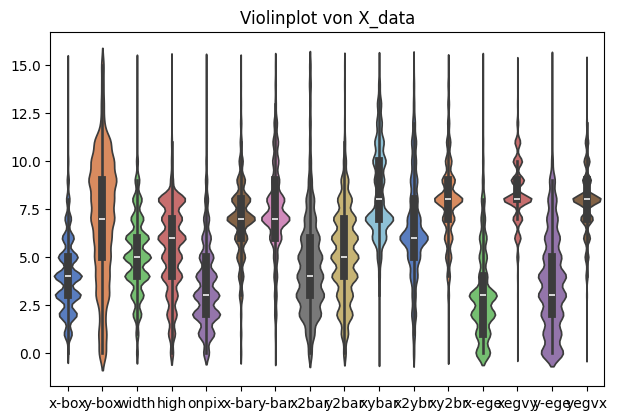

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_data.columns.names, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(y=column, data=X_data, palette='muted')
    plt.title(f'Violinplot von X_data')
plt.tight_layout()
plt.show()

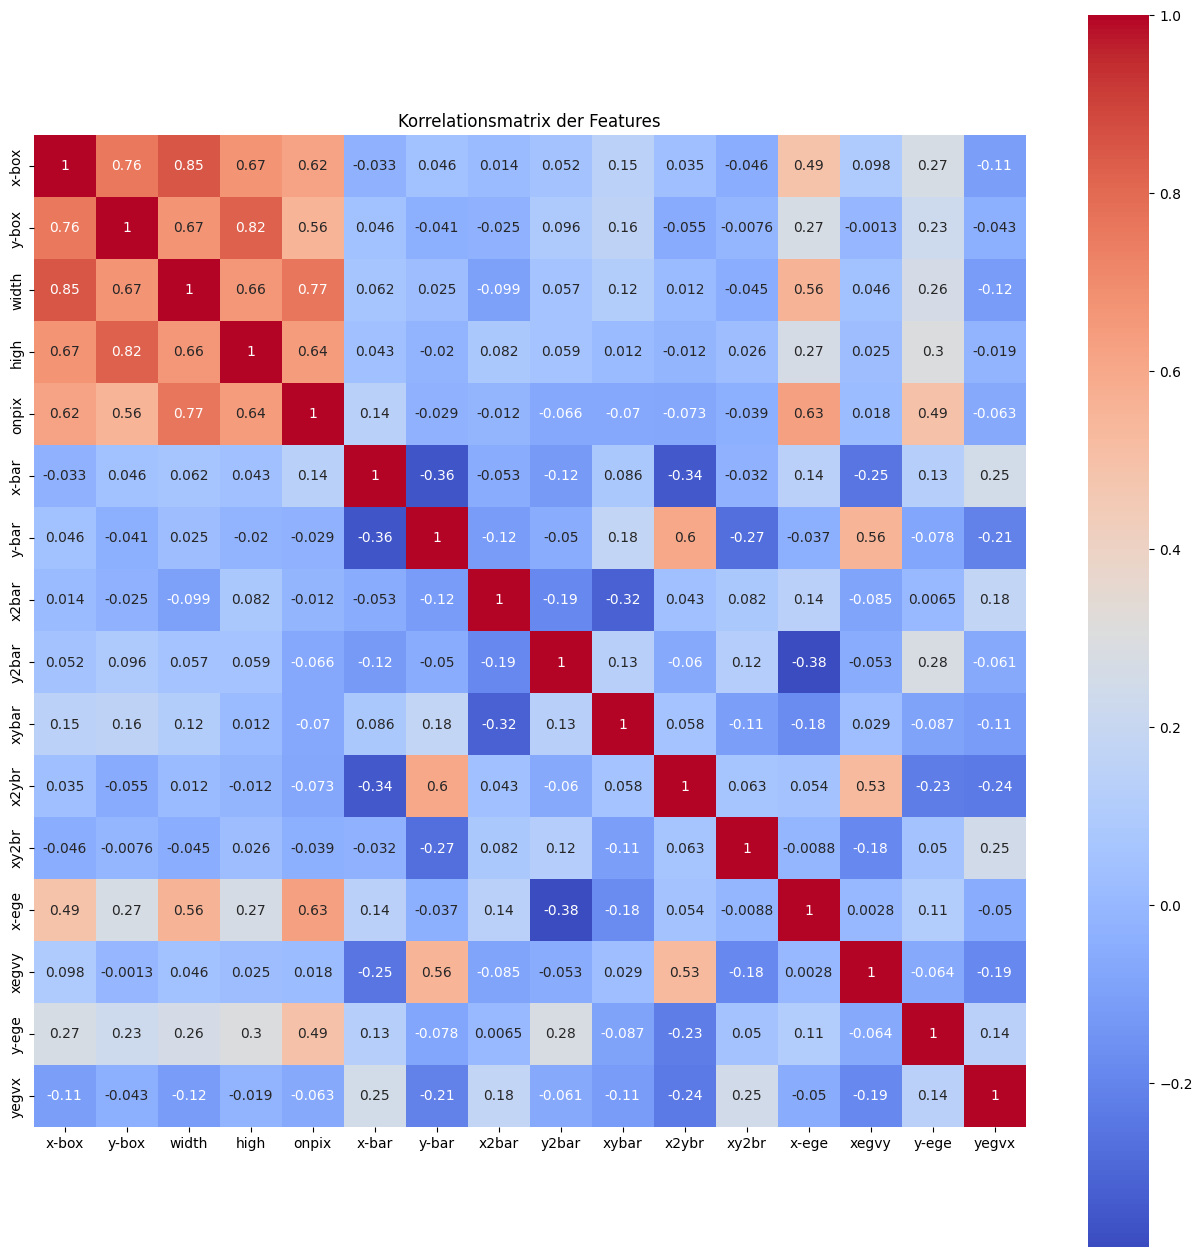

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(X_data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Korrelationsmatrix der Features')
plt.show()

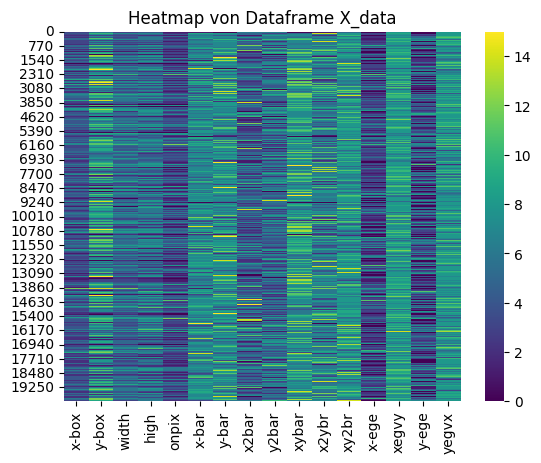

In [ ]:
draw_dataframe_heatmap(X_data, "X_data")

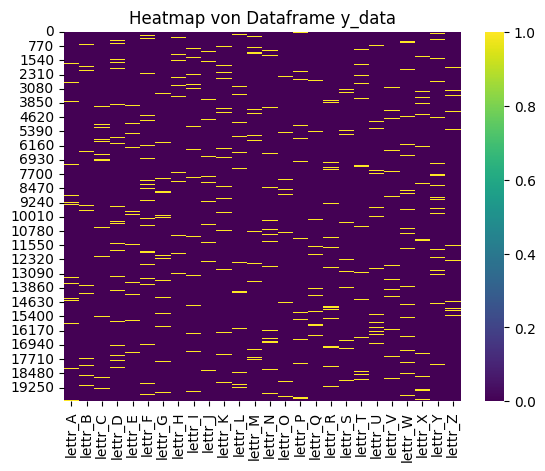

In [ ]:
draw_dataframe_heatmap(y_data, "y_data")

### Aufgabe 3.2 Learning/Validation-Split


In [ ]:
from sklearn.model_selection import train_test_split

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.2, train_size=0.8, random_state=DEFAULT_SEED)
print_dataframe_info(X_train_data, "X_train_data")
print_dataframe_info(X_test_data, "X_test_data")
print_dataframe_info(y_train_data, "y_train_data")
print_dataframe_info(y_test_data, "y_test_data")

log_finished_task("Train/Test Split prepared.")

Pandas DataFrame:  X_train_data
  - Form:  (16000, 16)
  - Shape:  256000
  - Head:        x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
5894      4      7      5     5      4      6      7      3      7     11   
3728      4      7      6     5      5      6      8      3      7     11   
8958      3      5      4     3      3      7      8      5      5      7   
7671      4     10      6     7      6      5      7      5      7      6   
5999      4     10      6     8      4      8     11      2      3      4   

      x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
5894      8      9      3      8      4      8  
3728      8      9      3      8      4      7  
8958      7      6      5      9      2      6  
7671      6     12      3      8      6      9  
5999     10      9      3     11      1      8  
Pandas DataFrame:  X_test_data
  - Form:  (4000, 16)
  - Shape:  64000
  - Head:         x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  

### Aufgabe 3.3 Modell trainieren inkl. early Stop

In [ ]:
# --- Definition des Models --
class LetterModel(torch.nn.Module):
    def __init__(self, feature_count=16, hl1_size=16*26, hl2_size=16*26, output_size=26):
        """
        Initialisiert das Neuronale Netz. Als erstes muss hierbei immer der
        Superkonstruktor aufgerufen werden. Danach wird das Tensor-Netz
        definiert.
        @params:
        - self - required : Objekt-Referenz
        - feature_count - optional : Anzahl der Eingabe Features (int)
        - hl1_size - optional : Anzahl Neuronen im 1. Hidden Layer (int)
        - hl2_size - optional : Anzahl Neuronen im 2. Hidden Layer (int)
        - output_size - optional : Anzahl Neuronen im Output Layer (int)
        """
        super().__init__()
        self.hl1 = torch.nn.Linear(feature_count, hl1_size)
        self.hl2 = torch.nn.Linear(hl1_size, hl2_size)
        self.out = torch.nn.Linear(hl2_size, output_size)
        #self.flatten = torch.nn.Flatten()
        #self.linear_relu_stack = torch.nn.Sequential(
        #    torch.nn.Linear(feature_count, hl1_size),
        #    torch.nn.ReLU(),
        #    torch.nn.Linear(hl1_size, hl2_size),
        #    torch.nn.ReLU(),
        #    torch.nn.Linear(hl2_size, output_size),
        #)

    def forward(self, x):
      """
      Forward von Tensoren durch das neuronale Netz.
      @params:
      - self - required : Objekt-Referenz
      - x - required : Eingabe Tensor
      """
      #x = self.flatten(x)
      x = torch.nn.functional.relu(self.hl1(x))
      x = torch.nn.functional.relu(self.hl2(x))
      x = self.out(x)
      return x
      #logits = self.linear_relu_stack(x)
      #return logits

log_finished_task("Modell-Klasse definiert.")


👍🏻 2024-11-12 07:04:22.767394 - Modell-Klasse definiert.


In [ ]:
# --- Trainieren des Modells ---

# Trainingsdaten in Tensoren konvertieren
X_train = torch.Tensor(X_train_data.values)
y_train = torch.Tensor(y_train_data.values)

if verbose:
    print_tensor_info(X_train, "X_train")
    print_tensor_info(y_train, "y_train")

#model = LetterModel(output_size=1)
model = LetterModel()
loss_function = torch.nn.CrossEntropyLoss()
#loss_function = torch.nn.MSELoss(reduction='sum')
learning_performance = []
optimizer = torch.optim.Adam(model.parameters(), lr=DEFAULT_LEARNING_RATE)
log_finished_task("Modell initialisiert, Starte nun mit Lernphase")

for epoch in range(EPOCH_ITERATIONS):
    y_prediction = model.forward(X_train)
    current_loss = loss_function(y_prediction, y_train)
    print_progress_bar(epoch, EPOCH_ITERATIONS - 1, prefix=f'Learning',  suffix=f'Loss: {current_loss.item()}')
    optimizer.zero_grad()
    current_loss.backward()
    optimizer.step()
    learning_performance.append(current_loss.item())
    if len(learning_performance) > 5:
        last_five = learning_performance[-5:]
        is_loss_encreasing = all(last_five[i] < last_five[i+1] for i in range(len(last_five) - 1))
        if is_loss_encreasing:
            print_progress_bar(epoch, EPOCH_ITERATIONS - 1, prefix=f'Learning',  suffix=f'Loss: {last_loss.item()}; early stopping', cancel=True)
            break
    last_loss = current_loss
log_finished_task("Lernphase beendet")


👍🏻 2024-11-12 07:04:27.326641 - Modell initialisiert, Starte nun mit Lernphase
Learning [================----------------------------------] 32.3% Loss: 0.06859417259693146; early stopping
👍🏻 2024-11-12 07:06:45.491051 - Lernphase beendet


Text(0.5, 1.0, 'Learning Performance')

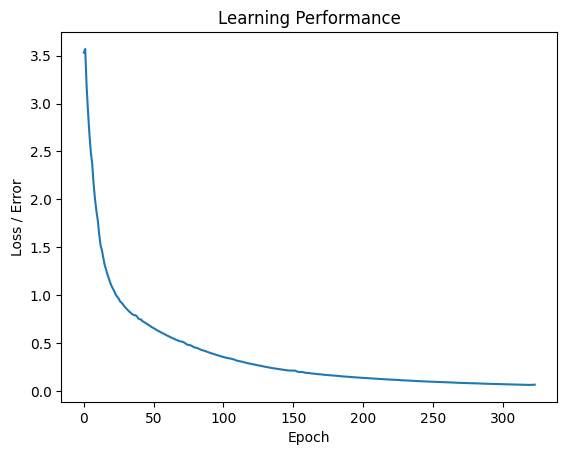

In [ ]:
# --- Visualisierung des Lernfortschritts
plt.plot(range(len(learning_performance)), learning_performance)
plt.xlabel('Epoch')
plt.ylabel('Loss / Error')
plt.title('Learning Performance')

In [ ]:
# --- Validierung des Modells ---
# Trainingsdaten in Tensoren konvertieren
X_test = torch.Tensor(X_test_data.values)
y_test = torch.Tensor(y_test_data.values)

if verbose:
    print_tensor_info(X_test, "X_test")
    print_tensor_info(y_test, "y_test")

expected_values = []
predictions = []
correct_result_count = 0
for i, test_data in enumerate(X_test):
    y_value = model.forward(test_data)
    y_best_value = torch.argmax(y_value)
    expected_value = y_test[i].argmax().item()
    expected_values.append(expected_value)
    if verbose:
        print(f"Predicted: {y_best_value.item()}, expected: {expected_value}")
    predictions.append(y_best_value)
    if y_best_value == expected_value:
        correct_result_count += 1
    print_progress_bar(i, len(X_test) - 1, prefix=f'Validiere',  suffix=f'Erfolgreich: {correct_result_count} von {len(predictions)}')

log_finished_task(f'Validierung beendet mit {correct_result_count} richtig klassifizierten von {len(predictions)} Testfällen')

Validiere [==================================================] 100.0% Erfolgreich: 3805 von 4000
👍🏻 2024-11-12 07:06:50.936490 - Validierung beendet mit 3805 richtig klassifizierten von 4000 Testfällen


### Aufgabe 3.4 Torch Modell speichern


In [ ]:
# Modell mit torch Bordmitteln abspeichern.
torch.save(model, 'model_weights.pth')

### Aufgabe 3.5 Accuracy (gerne auch Precision und Recall) visualisieren


Accuracy: 0.95
Precision: 0.95
Recall: 0.95


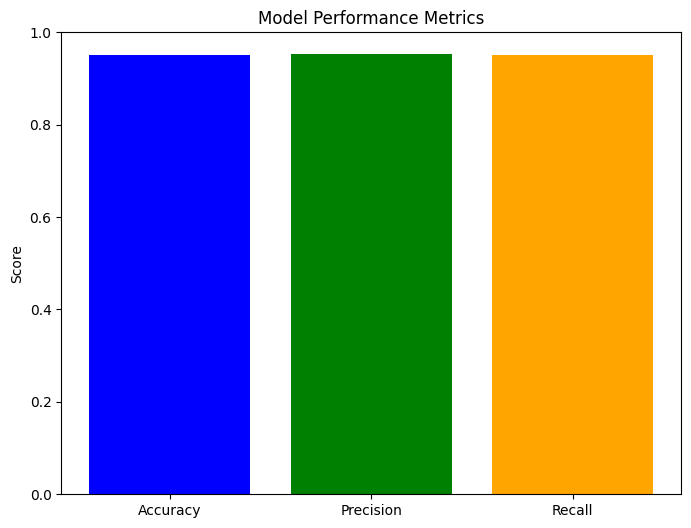

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(expected_values, predictions)
precision = precision_score(expected_values, predictions, average='weighted')
recall = recall_score(expected_values, predictions, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Balkendiagramm
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Setzt die Skala auf 0 bis 1
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.show()

### Aufgabe 3.6 Model Graph plotten


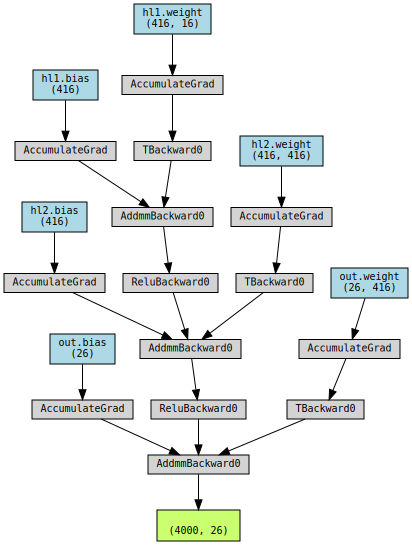

In [ ]:
from torchviz import make_dot

# Modell als Graph anzeigen
#make_dot(y_test, params=dict(model.named_parameters())).render("model_architecture", format="png")
make_dot(model(X_test), params=dict(model.named_parameters()))


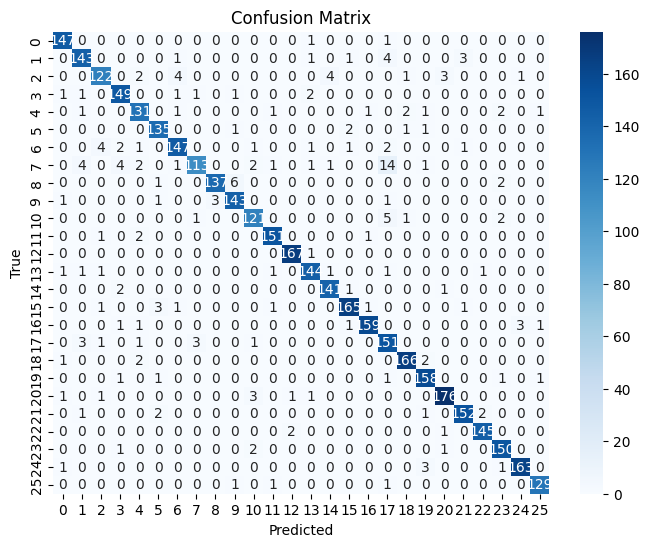

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Beispiel: Vorhersagen und echte Werte

# Confusion Matrix berechnen
cm = confusion_matrix(expected_values, predictions)

# Heatmap zeichnen
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Aufgabe 3.7 Loss von train history plotten
(weitere sinnvolle plots willkommen)

In [ ]:
# todo

# Fazit

